In [1]:
import matplotlib.pyplot as plt

In [2]:
from src.image_process.image_io import LoadImage,  WriteImage

In [3]:
# loading image
print('Loading image')

file_path = 'data/Cu30W_beamstopper_original.dm3'

load_image = LoadImage(file_path=file_path)

data = load_image.data

Loading image


c:\Users\diego.nogueira\AppData\Local\Programs\Python\Python312\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [4]:
import src.image_process.pre_process as prep

Pre processing image


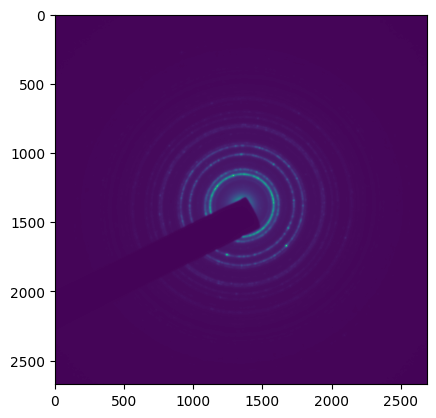

In [5]:
# pre process pipeline
print('Pre processing image')

median_filter = prep.MedianFilter(kernel_size=5)
all_positive = prep.AllPositive()
gaussian_blur = prep.GaussianBlur()

pre_processors = [median_filter, all_positive, gaussian_blur]

pre_pipe = prep.PreProcessPipe(pre_processors=pre_processors)
data = pre_pipe.pre_process_pipe(data)

plt.imshow(data)

In [6]:
import src.image_process.mask.mask_getters as maget

Acquiring mask


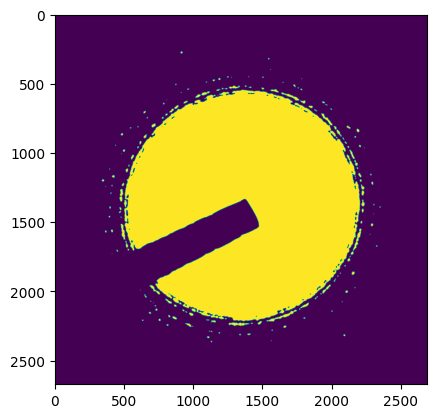

In [7]:
# acquiring mask
print('Acquiring mask')

mean_mask = maget.MeanTreshMask(.1)

mask = maget.superpose_masks(data, [mean_mask])
plt.imshow(mask)

In [8]:
from src.image_process.edp_center.center_optimization.opt_funcs import Area

In [9]:
penalty_func = Area(data, mask).get_penalty_func()

In [10]:
from src.image_process.edp_center.centroid import get_centroid
centroid = get_centroid(data)
centroid

(1352.773524888863, 1337.9183046753803)

In [11]:
from src.image_process.edp_center.center_optimization.optimization import optimize_center

center = optimize_center(penalty_func, data.shape, initial_guess=centroid)
center

(1350.000005092716, 1382.9999950325373)

In [12]:
from src.image_process.diffraction_pattern import eDiffractionPattern

edp = eDiffractionPattern(data, center)

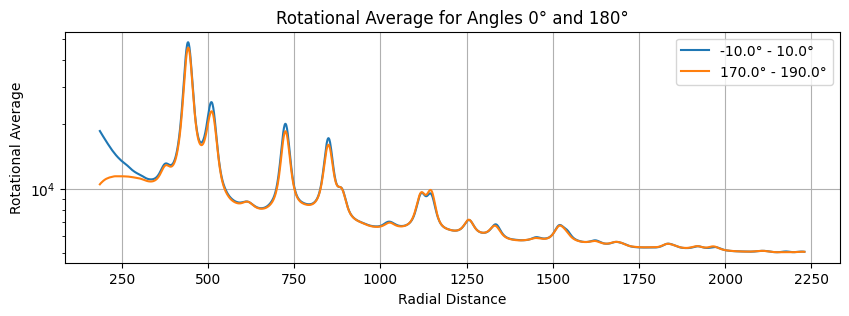

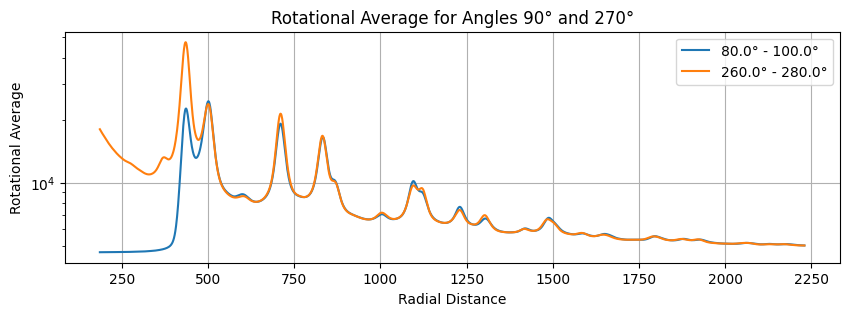

In [13]:
from src.image_process.edp_center.prober import CenterProber

CenterProber(edp).probe(0, 20)

from image_process.elliptical_distortion.ellipse_params    



from image_process.elliptical_distortion.elliptical_corrector import EllipseCorrector

el_corrector = EllipseCorrector(correction_params)
new_edp = el_corrector.correct(edp)
data = new_edp.data

polar_rep = PolarRepresentation(edp)
polar_rep.get_polar_representation(start=0.1, end=0.6)

polar_line_mask = pmask.PolarLineMask(polar_representation=polar_rep).get_polar_line_mask(angular_range_expansion=0,cyclic_shift=0)